[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/Yquetzal/tnetwork/blob/master/demo_community_classes.ipynb)

# Dynamic Community classes

## Table of Contents

1.  [Initializing a dynamic community structure](#creating)
  *   [Using a snapshot representation]
  *  [Using an interval graph representation]
2. [Accessing properties of communities](#accessing)
3. [Duration,frequencies of relations between nodes and communities](#duration)
4. [Visualization](#visu)
5. [Conversion between snapshots and interval graphs](#conversion)
6. [Slicing](#slicing)



If tnerwork library is not installed, you need to install it, for instance using the following command

In [1]:
#%%capture #avoid printing output
#!pip install --upgrade git+https://github.com/Yquetzal/tnetwork.git

In [2]:
%load_ext autoreload

%autoreload 2
import tnetwork as tn

<a id='creating'></a>
## Initializing a dynamic community structure
### With snapshots

In [3]:
com_sn = tn.DynCommunitiesSN()
com_sn.add_affiliation("a","com1",1)
com_sn.add_affiliation({"b","c"},"com2",[2,3])
com_sn.add_affiliation("d",{"com1"},[1,3])


### With Interval graphs
As with dynamic graphs, intervals are closed on the left and open on the right.
Periods can be represented in different manners, as shown in the following example

In [4]:
com_ig = tn.DynCommunitiesIG()
com_ig.add_affiliation("a","com1",(1,2))
com_ig.add_affiliation({"b","c"},"com2",tn.Intervals((2,4)))
com_ig.add_affiliation("d",{"com1"},[(1,2),(3,4)])

<a id='accessing'></a>

## Accessing properties of communities

### Check communities
We check the sate of communities at a particular time.

Static communities can be accessed in two forms

   * in the **community** form (key = community ID, value = set of nodes) 
   * in **affiliation** form (key = a noe, value = set of communities)

Example, state of communities at time 3, in *community* and *affiliation* forms

In [5]:
print(com_sn.communities(3))
print(com_sn.affiliations(3))
print(com_ig.communities(3))
print(com_ig.affiliations(3))

{'com2': {'c', 'b'}, 'com1': {'d'}}
{'c': {'com2'}, 'b': {'com2'}, 'd': {'com1'}}
{'com2': {'b', 'c'}, 'com1': {'d'}}
{'c': {'com2'}, 'b': {'com2'}, 'd': {'com1'}}


The same form exist to access dynamic communities.
   * communities form: for each community, for each of its nodes, presence time
   * affiliation form: for each node, for each of its communities, presence time

In [6]:
print(com_sn.communities())
print(com_ig.communities())
print(com_sn.affiliations())
print(com_ig.affiliations())

{'com1': {'a': [1], 'd': [1, 3]}, 'com2': {'c': [2, 3], 'b': [2, 3]}}
{'com1': {'a': [1,2[ , 'd': [1,2[ [3,4[ }, 'com2': {'c': [2,4[ , 'b': [2,4[ }}
{'a': {'com1': [1]}, 'd': {'com1': [1, 3]}, 'c': {'com2': [2, 3]}, 'b': {'com2': [2, 3]}}
{'a': {'com1': [1,2[ }, 'c': {'com2': [2,4[ }, 'b': {'com2': [2,4[ }, 'd': {'com1': [1,2[ [3,4[ }}


### In each snapshot
For snapshots representation, it is also possible to obtain communities in each snapshot

In [7]:
print(com_sn.snapshot_affiliations())

SortedDict({1: {'a': {'com1'}, 'd': {'com1'}}, 2: {'c': {'com2'}, 'b': {'com2'}}, 3: {'c': {'com2'}, 'b': {'com2'}, 'd': {'com1'}}})


<a id='duration'></a>

## Duration/frequencies of relations between nodes and communities
One can check how long does a node belong to a community, in total

In [8]:
print(com_sn.affiliations_durations("d","com1"))
print(com_ig.affiliations_durations("d","com1"))

2
2


One can also check directly the duration of affiliations of each node to each community

In [9]:
print(com_sn.affiliations_durations())
print(com_ig.affiliations_durations())

{('a', 'com1'): 1, ('b', 'com2'): 2, ('c', 'com2'): 2, ('d', 'com1'): 2}
{('a', 'com1'): 1, ('b', 'com2'): 2, ('c', 'com2'): 2, ('d', 'com1'): 2}


<a id='visu'></a>

## Visualization
A simple example of visualization. To see more possibilities, see the dedicated section of the documentation

Note that it is the same function which is used to plot longitudinial graphs and communities. That is why we need to specify that what we provide corresponds to the `communities` parameter. One can provide both a graph and a dynamic community structure to this function.

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


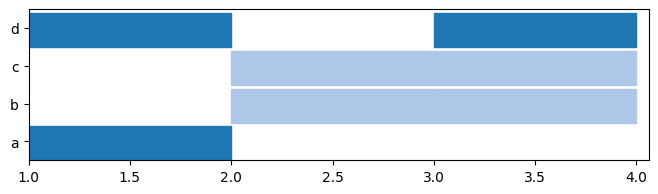

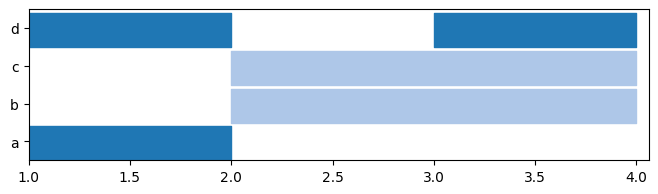

In [10]:
plot = tn.plot_longitudinal(communities=com_sn,height=200)
plot = tn.plot_longitudinal(communities=com_ig,height=200)

One can also plot a graph with nodes color corresponding to communities.
In this example, we create a dynamic graph with a fix structure, and plot the communities we defined above

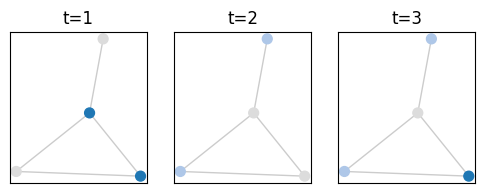

In [11]:
graph_toy = tn.DynGraphIG()
graph_toy.add_interaction("a","b",(1,4))
graph_toy.add_interaction("a","c",(1,4))
graph_toy.add_interaction("a","d",(1,4))
graph_toy.add_interaction("b","d",(1,4))

plot = tn.plot_as_graph(graph_toy,com_ig,[1,2,3],auto_show=True,width=200,height=200)

<a id='conversion'></a>

## Conversion between snapshots and interval representation
Dynamic network representations can be converted by calling the appropriate function.
  * When converting to interval graphs, we provide the duration of each snapshots
  * When converting to snapshots, we provide the slices to which each snapshot should correspond. Note that it is tehrefore possible to have snapshots corresponding to overlapping periods

In [12]:
converted_ig = com_sn.to_DynCommunitiesIG(1)
print(converted_ig.communities())
print(com_ig.communities())

{'com1': {'a': [1,2[ , 'd': [1,2[ [3,4[ }, 'com2': {'c': [2,4[ , 'b': [2,4[ }}
{'com1': {'a': [1,2[ , 'd': [1,2[ [3,4[ }, 'com2': {'c': [2,4[ , 'b': [2,4[ }}


In [13]:
converted_sn = com_ig.to_DynCommunitiesSN(slices=[(x,x+1) for x in range(1,4)])
print(converted_sn.communities())
print(com_sn.communities())

{'com1': {'a': [1], 'd': [1, 3]}, 'com2': {'b': [2, 3], 'c': [2, 3]}}
{'com1': {'a': [1], 'd': [1, 3]}, 'com2': {'c': [2, 3], 'b': [2, 3]}}


<a id='slicing'></a>

## Slicing
Slicing part of networks can be useful, for instance to visualize only a fraction of a large dynamic partition

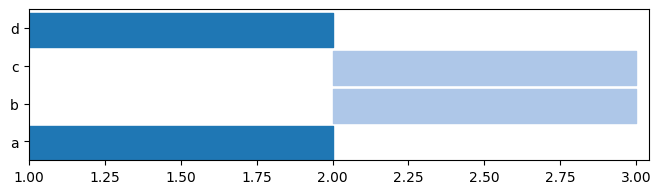

In [14]:
sliced = com_ig.slice(start=1,end=3)
plot = tn.plot_longitudinal(communities=sliced,height=200)